<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/ex1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Regresión Lineal
***
## Empezamos con una variable


## Lectura de datos (Población en ciudades (x10.000) e Ingreso medio (x 10.000)

In [39]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = pd.read_csv('https://drive.google.com/uc?id=16jQHaXQNBNIe-wYZvA52stkBwOP6kQta', names=['Poblacion', 'Ingresos'])
data1.head()

,Poblacion,Ingresos
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [45]:
data2 = pd.read_csv('https://drive.google.com/uc?id=1JyEVQ0k57fNzl9ZJJn0rJdHqu7K5cJ3-')
data2.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


### Graficamos los datos a ver si vemos una posible relación lineal  entre población (var indep) e y (var objetivo o dep.)


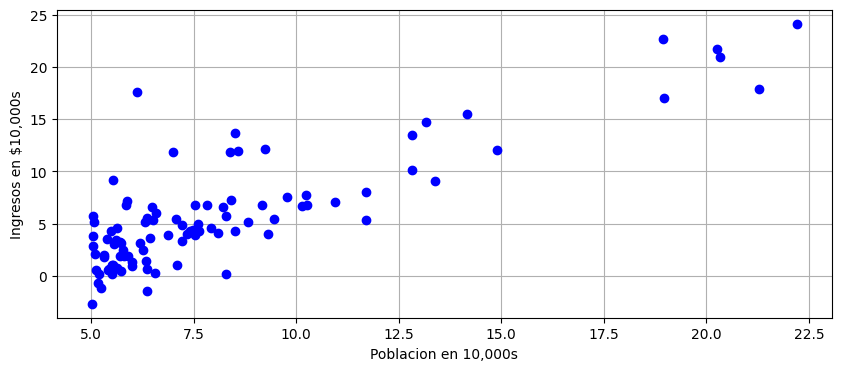

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Poblacion en 10,000s')
plt.ylabel('Ingresos en $10,000s')
plt.grid()
plt.plot(data1.Poblacion, data1.Ingresos, 'bo')

## Gradiente Descendente

Nos planteamos un modelo (hipótesis)
$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

Debemos encontrar los parámetros  $\theta$  a partir de nuestro conjunto de datos utilizando la técnica del gradiente descendente.

#### 1.- Fundamentos

El objetivo de la regresión lineal es minimizar la función de coste

$J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

donde la hipótesis $h_{\theta}(x)$ está dada por el modelo lineal

$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

Debemnos encontrar son los valores de $\theta_j$ que son los parámetros de nuestro modelo y que minimicen la función de coste $J(\theta)$. Utilizaremos el algoritmo iterativo del gradiente descendente visto en clase.

En cada iteración del algoritmo debemos realizar la actualización de los valores  $\theta_j$ de acuerdo a .

$\theta_j:=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ (actualización simultánea de $\theta_j$ para todo $j$)

En cada iteración, los parámetros $\theta_j$ se aproximan al valor óptimo que nos permite obrener el valor mínimo de $J(\theta)$.

#### 2.- Implementación

Recordar que debemos añadir una columna de 1's al inicio de nuestro conjunto de datos para poder  calcular en el mismo paso  $\theta_0$ y debemos inicializar  $\theta_j$ a $0$.

In [46]:
# Preparamos oos datos.
def prepareData(data, n):
    """
    Add 1s column, convert to matrix,
    initialize theta.
    Args:
        data: dataframe
        n: int
    Returns:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Insertamos la columna de 1's en el primer puesto.
    data.insert(0, 'Ones', 1)

    # Ya tenemos nuestros datos.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convertimos a matrices e inicializamos theta con 0s.
    # Theta is a vector [n + 1 x 1] y su traspuesto a vector [1 x n+1],
    # n es el número de características (var. predictoras).
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta



#### Cálculo de la función de  Coste $J(\theta)$



In [47]:
# Cálculo de la función de coste.
def computeCost(x, y, theta):
    """
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost



In [48]:
# Número de variables.
n = len(data2.columns)-1 # quitamos la columma objetivo (a predecir)

In [49]:
# Obtenemos la matriz X (con un 1 como primera columna, recordar)
x, y, theta = prepareData(data2, n)

In [50]:
# Revisemos las matrices.
x.shape, y.shape, theta.shape

((15, 2), (15, 1), (2, 1))

In [65]:
x

matrix([[1.  , 1.47],
        [1.  , 1.5 ],
        [1.  , 1.52],
        [1.  , 1.55],
        [1.  , 1.57],
        [1.  , 1.6 ],
        [1.  , 1.63],
        [1.  , 1.65],
        [1.  , 1.68],
        [1.  , 1.7 ],
        [1.  , 1.73],
        [1.  , 1.75],
        [1.  , 1.78],
        [1.  , 1.8 ],
        [1.  , 1.83]])

In [66]:
y

matrix([[52.21],
        [53.12],
        [54.48],
        [55.84],
        [57.2 ],
        [58.57],
        [59.93],
        [61.29],
        [63.11],
        [64.47],
        [66.28],
        [68.1 ],
        [69.92],
        [72.19],
        [74.46]])

In [51]:
#veamos el coste inicial ( theta = 0s)
computeCost(x, y, theta)

1949.9514633333333

#### Gradiente Descendente

Implementaremos el algoritmo mediante un bucle.  

Una buena forma de verificar que el algoritmo funciona correctamente es observar el valor de $J(\theta)$ y comprobar que disminuye con cada paso. Después de la implementación correcta del  gradiente descendente, el valor de $J(\theta)$ nunca debería aumentar y debería converger a un valor estable al final del algoritmo. Los parámetros finales se utilizarán para dibujar la recta de ajuste y hacer predicciones sobre los ingresos en zonas de 35.000 y 70.000 habitantes.



In [52]:
def gradientDescent(x, theta, max_iter,epsilon = 10e-5):
    """

    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
        max_iter:max number of iterations in the algorithm
        epsilon: diference between two sucesive J (cost values)
    Returns:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
        i: iteration at which convergence is obtained

    """
    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)



Trabajaremos con un "learning rate" $\alpha$ de 0.01 y 10000 iteraciones como máximo.

In [67]:
iterations = 10000
#alpha = 0.01
#epsilon = 10e-20
epsilon = 0.00001
alpha = 0.2

In [68]:
theta, J_vals, iter= gradientDescent(x, theta, iterations,epsilon)

Convergencia Alcanzada ! 4714  iteraciones


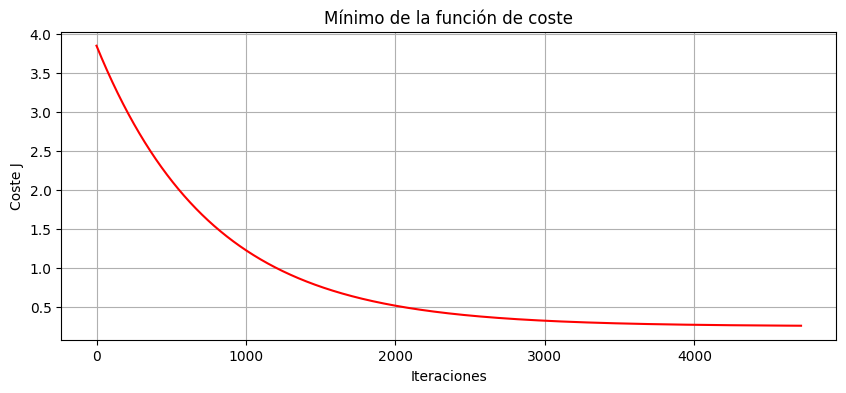

In [69]:
plt.figure(figsize=(10, 4))
plt.xlabel('Iteraciones')
plt.ylabel('Coste J')
plt.title('Mínimo de la función de coste')
plt.grid()
ejex = np.arange(iter+1)
plt.plot(ejex, J_vals, 'r')

In [70]:
computeCost(x, y, theta)

0.25733438457036856

In [71]:
theta

matrix([[-37.20815419],
        [ 60.15278768]])

#### Dibujar la recta de ajuste

In [58]:
theta_f = list(theta.flat)
theta_f

[1.1608135265394024, 36.98408631063453]

<ipython-input-59-6edd8207e125>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(xs, ys, 'r-', label='Regresión Lineal: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))


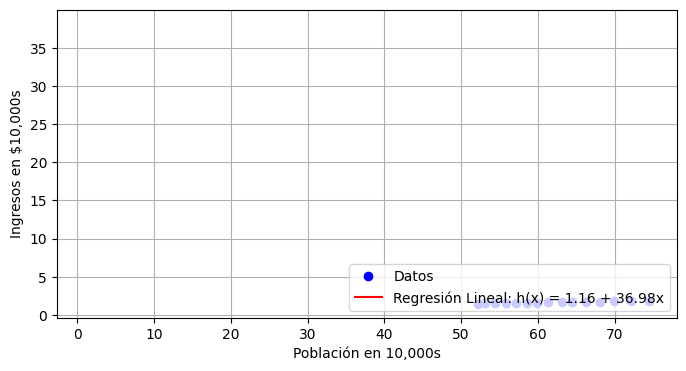

In [59]:
xs = np.arange(1, 2)
ys = theta_f[0] + theta_f[1] * xs
plt.figure(figsize=(8, 4))
plt.xlabel('Población en 10,000s')
plt.ylabel('Ingresos en $10,000s')
plt.grid()
plt.plot(data2.Weight, data2.Height, 'bo', label='Datos')
plt.plot(xs, ys, 'r-', label='Regresión Lineal: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4)

### El coeficiente de determinación se puede calcular como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [60]:
y_calc = np.array(theta_f[0] + theta_f[1] * x[:,1].flat)
y_calc = y_calc.reshape(len(y_calc),1)

In [61]:
print("Ingresos Reales   y    Calculados")
print(np.c_[y[0:5],y_calc[0:5]])

Ingresos Reales   y    Calculados
[[52.21       55.5274204 ]
 [53.12       56.63694299]
 [54.48       57.37662472]
 [55.84       58.48614731]
 [57.2        59.22582903]]


In [62]:
suma_errores = np.sum(np.power((y-y_calc),2))
suma_errores

115.5217626878132

In [63]:
# Error cuadrático medio
MSE = suma_errores/x.shape[0]
MSE

7.701450845854213

## El coeficiente de determinación se puede calcular como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [64]:
r = y - y_calc
m,n = x.shape[0],x.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum (np.power((y - np.mean(y)),2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.8056234382100096


#### Predicciones
población de 35000 y 70000

In [ ]:
print((theta_f[0] + theta_f[1] * 3.5) * 10000)
print((theta_f[0] + theta_f[1] * 7) * 10000)

2798.3832425143705
44554.55293735359


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data2 = pd.read_csv('https://drive.google.com/uc?id=1JyEVQ0k57fNzl9ZJJn0rJdHqu7K5cJ3-')
data2.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [19]:
x=data2['Weight']
y=data2['Height']

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gradient_descent(x, y, theta0 = 0, theta1 = 0, iterations = 10000, alpha = 0.01, epsilon = 0.01):

    def cost_function(x, y):
        return lambda theta0, theta1: np.sum((theta0 + theta1 * x - y) ** 2) / len(x)

    def derivative_theta_0(x, y):
        return lambda theta0, theta1: 2/len(x) * np.sum(theta0 + theta1 * x - y)

    def derivative_theta_1(x, y):
        return lambda theta0, theta1: 2/len(x) * np.sum((theta0 + theta1 * x - y) * x)

    J = cost_function(x,y)
    J0 = derivative_theta_0(x,y)
    J1 = derivative_theta_1(x,y)

    convergence = False
    for i in range(0,iterations):
        cost = J(theta0,theta1)
        Jp0 = J0(theta0,theta1)
        Jp1 = J1(theta0,theta1)

        theta0 = theta0 - alpha * Jp0
        theta1 = theta1 - alpha * Jp1

        cost_new = J(theta0,theta1)
        convergence = np.abs(cost_new - cost) < epsilon
        cost = cost_new

        if convergence == True:
            print("Convergence FOUND!")
            print("Theta0: " + str(theta0))
            print("Theta1: " + str(theta1))
            print(str(i) + " iterations")
            print("Cost: " + str(cost))
            break

    if convergence == True:
        return theta0,theta1
    else:
        return 0,0


In [23]:
x = data2['Height']
y = data2['Weight']

th0, th1 = gradient_descent(x,y,theta0 = 0, theta1 = 0,alpha=0.2,epsilon=0.00001)



Convergence FOUND!
Theta0: -38.13574238981258
Theta1: 60.712902153217186
3137 iterations
Cost: 0.5031894424398267


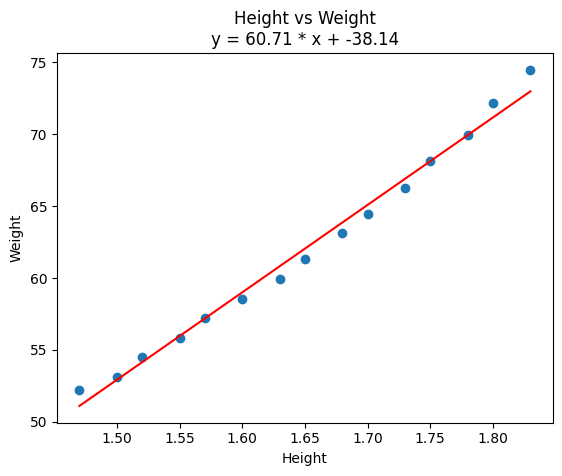

In [24]:
plt.plot(x,th1*x+th0,'r-')
plt.title('Height vs Weight\ny = ' + str(round(th1,2)) + ' * x + ' + str(round(th0,2)))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x, y)